In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df = df.select_dtypes(include=[np.number]) # select only numerical columns

#multiply all values by 100
df = df.map(lambda x: x*100)
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,300,2200.0,100,0,725.00
1,100,100,3800.0,100,0,7128.33
2,100,300,2600.0,0,0,792.50
3,100,100,3500.0,100,0,5310.00
4,0,300,3500.0,0,0,805.00


In [4]:
df = sns.load_dataset('flights')
# df.set_index('year', inplace=True)

#find how many years
print(f'Years available: {", ".join([str(year) for year in df.index.unique()])}.\nNumber of years: {len(df.index.unique())}')



Years available: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143.
Number of years: 144


C:\Users\wesst\AppData\Local\Temp\ipykernel_9876\1078147476.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .assign(date = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str)))


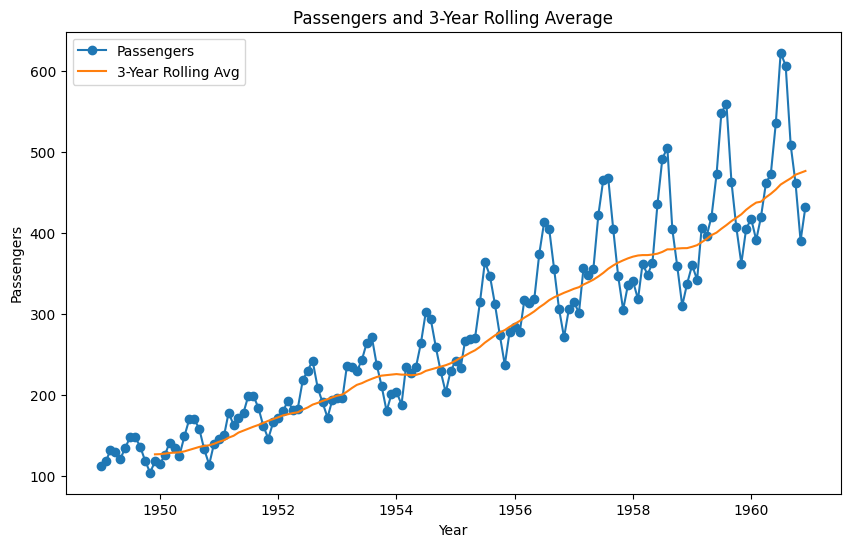

In [5]:
import matplotlib.pyplot as plt
# df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
# df.set_index('date', inplace=True)
# df = df.select_dtypes(include=[np.number]).drop(columns='year')

# Assuming df['rolling_avg'] and other preprocessing has been correctly done.
# df['rolling_avg'] = df['passengers'].rolling(12).mean()
# df.index = pd.to_datetime(df.index, format='%Y')
# df.interpolate(method='linear', inplace=True)


df = (df
    .assign(date = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str)))
    .set_index('date')
    .drop(columns=['month','year'])
    .assign(rolling_avg = lambda x: x['passengers'].rolling(12).mean()))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['passengers'], label='Passengers', linestyle='-', marker='o')
ax.plot(df.index, df['rolling_avg'], label='3-Year Rolling Avg', linestyle='-')
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.set_title('Passengers and 3-Year Rolling Average')
ax.legend()

plt.show()


In [6]:
df = sns.load_dataset('titanic')
df = df.select_dtypes(include=[np.number]) # select only numerical columns

#standardize all values
df_std  = df.apply(lambda x: (x - x.mean()) / x.std())

#normalize all values
df_norm = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_std.head(), df_norm.head()

(   survived    pclass       age     sibsp     parch      fare
 0 -0.788829  0.826913 -0.530005  0.432550 -0.473408 -0.502163
 1  1.266279 -1.565228  0.571430  0.432550 -0.473408  0.786404
 2  1.266279  0.826913 -0.254646 -0.474279 -0.473408 -0.488580
 3  1.266279 -1.565228  0.364911  0.432550 -0.473408  0.420494
 4 -0.788829  0.826913  0.364911 -0.474279 -0.473408 -0.486064,
    survived  pclass       age  sibsp  parch      fare
 0       0.0     1.0  0.271174  0.125    0.0  0.014151
 1       1.0     0.0  0.472229  0.125    0.0  0.139136
 2       1.0     1.0  0.321438  0.000    0.0  0.015469
 3       1.0     0.0  0.434531  0.125    0.0  0.103644
 4       0.0     1.0  0.434531  0.000    0.0  0.015713)

In [7]:
df_norm.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [8]:
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [9]:
#find unique values in all columns
unique_values = df.apply(lambda x: x.unique().size)
unique_values

survived      2
pclass        3
age          89
sibsp         7
parch         7
fare        248
dtype: int64

In [10]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [11]:
diabetes = datasets.load_diabetes()
X, y = shuffle(diabetes.data, diabetes.target, random_state=13)

X = X.astype(np.float32)

# diabetes.target

In [12]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [13]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:03<00:00, 10.64it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 397, number of used features: 10
[LightGBM] [Info] Start training from score 151.722922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [14]:
df = sns.load_dataset('titanic')

df = (df
      .rename(columns={'class': 'passenger_class'})
      .assign(age_in_months=lambda x: x.age*12))

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,passenger_class,who,adult_male,deck,embark_town,alive,alone,age_in_months
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,264.00
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False,456.00
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True,312.00
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False,420.00
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,420.00


In [15]:
df = sns.load_dataset('titanic')

# Drop columns with missing values
df = df.dropna(axis=1) # axis=1 drops columns, axis=0 drops rows
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.25,Third,man,True,no,False
1,1,1,female,1,0,71.28,First,woman,False,yes,False
2,1,3,female,0,0,7.92,Third,woman,False,yes,True
3,1,1,female,1,0,53.10,First,woman,False,yes,False
4,0,3,male,0,0,8.05,Third,man,True,no,True


In [16]:
df = sns.load_dataset('titanic')

# Convert 'sex' and 'embarked' to category datatype
df[['sex', 'embarked']] = df[['sex', 'embarked']].astype('category') #we can use category, numeric, or object type

In [17]:
df = sns.load_dataset('titanic')

# Find most frequent values in 'embark_town'
most_frequent = df['embark_town'].value_counts().idxmax()
print(f"Most frequent embark town: {most_frequent}")

Most frequent embark town: Southampton


In [18]:
df = sns.load_dataset('titanic')

aggregated = df.agg({
    'age': ['min', 'max', 'mean'],
    'fare': ['sum','mean', 'median']
})

In [19]:
aggregated.fillna('', inplace=True)
print(aggregated)

         age     fare
min     0.42         
max    80.00         
mean   29.70    32.20
sum          28693.95
median          14.45


In [20]:
df = sns.load_dataset('titanic')

df.sort_values(by = ['class', 'fare'], inplace=True, ascending=[True, False])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.00,0,0,512.33,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.00,0,1,512.33,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.00,0,0,512.33,C,First,man,True,B,Cherbourg,yes,True
27,0,1,male,19.00,3,2,263.00,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.00,3,2,263.00,S,First,woman,False,C,Southampton,yes,False


In [21]:
df = sns.load_dataset('titanic')

df = df[df['class'].isin(['First', 'Second'])]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.00,0,0,51.86,S,First,man,True,E,Southampton,no,True
9,1,2,female,14.00,1,0,30.07,C,Second,child,False,NaN,Cherbourg,yes,False
11,1,1,female,58.00,0,0,26.55,S,First,woman,False,C,Southampton,yes,True


In [22]:
df = sns.load_dataset('titanic')

grouped = (df
           .groupby('class')
           .agg({'age': 'mean', 'fare': 'median'})
)

grouped

,age,fare
class,,
First,38.23,60.29
Second,29.88,14.25
Third,25.14,8.05


In [23]:
first_class = (df.
               groupby('class')
               .get_group('First')
)

first_class.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.00,0,0,51.86,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.00,0,0,26.55,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.00,0,0,35.50,S,First,man,True,A,Southampton,yes,True


In [24]:
df = sns.load_dataset('titanic')

# Select a random sample of 5 rows
sample = df.sample(5)
sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
821,1,3,male,27.00,0,0,8.66,S,Third,man,True,NaN,Southampton,yes,True
655,0,2,male,24.00,2,0,73.50,S,Second,man,True,NaN,Southampton,no,False
209,1,1,male,40.00,0,0,31.00,C,First,man,True,A,Cherbourg,yes,True
833,0,3,male,23.00,0,0,7.85,S,Third,man,True,NaN,Southampton,no,True
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False


In [25]:
df = sns.load_dataset('titanic')

# Get value at specific location
value = df.at[54, 'age']
value

65.0

In [26]:
df = sns.load_dataset('titanic')

# Create a pivot table
pivot_table = df.pivot_table(values='survived', index='class', columns='sex')
pivot_table

sex,female,male
class,,
First,0.97,0.37
Second,0.92,0.16
Third,0.50,0.14


In [27]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True


In [28]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
   'A': [1, 2, 3],
   'B': [4, 5, 6]
})

# Function to add a value to all elements of the DataFrame
def add_value(data, value):
    return data + value

# Using pipe to apply the function
df_piped = df.pipe(add_value, 10)

print(df_piped)


    A   B
0  11  14
1  12  15
2  13  16
